In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [563]:
dataset=pd.read_csv('Car_Purchasing_Data-Copy1.csv',encoding='ISO-8859-1')

In [564]:
dataset.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


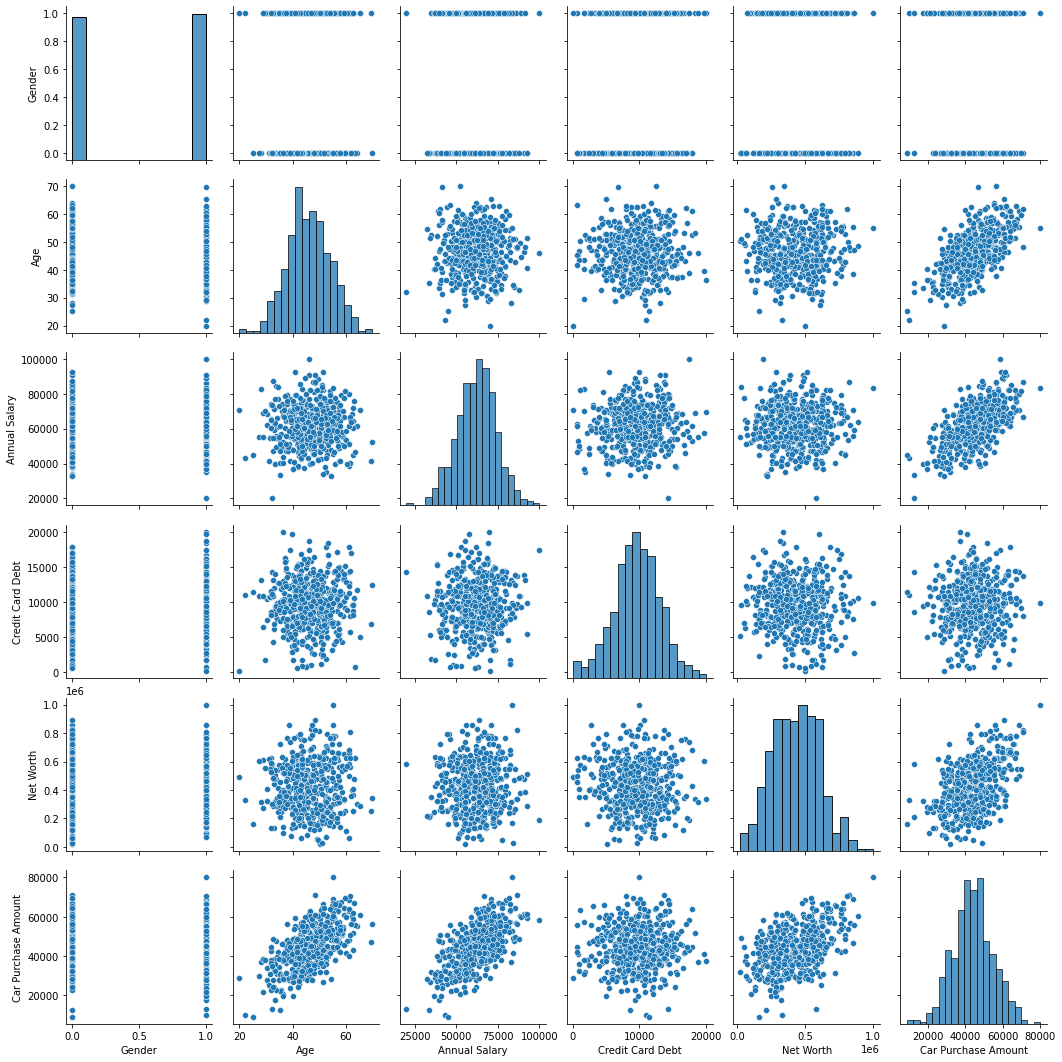

In [565]:
sns.pairplot(dataset)

In [566]:
X=dataset.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis=1)

In [567]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [568]:
y=dataset['Car Purchase Amount']

In [569]:
y.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: Car Purchase Amount, dtype: float64

In [570]:
from sklearn.preprocessing import StandardScaler

In [571]:
sc=StandardScaler()

In [572]:
X=sc.fit_transform(X)

In [573]:
y=y.values.reshape(-1,1)

In [574]:
y=sc.fit_transform(y)

In [575]:
from sklearn.model_selection import train_test_split

In [576]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [577]:
X_train.shape

(400, 5)

In [578]:
y_train.shape

(400, 1)

In [579]:
y_test.shape

(100, 1)

In [580]:
ann=tf.keras.models.Sequential()

In [581]:
ann.add(tf.keras.layers.Dense(units=30,input_dim=5,activation='relu'))

In [582]:
ann.add(tf.keras.layers.Dense(units=30,activation='relu'))

In [583]:
ann.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [584]:
ann.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 30)                180       
_________________________________________________________________
dense_74 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 31        
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [585]:
ann.compile(optimizer='adam',loss='mean_squared_error')

In [586]:
epoch_hist=ann.fit(X_train,y_train,epochs=10,batch_size=25,verbose=1,validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/10
320/320 [==============================] - 0s 981us/sample - loss: 1.0551 - val_loss: 0.6621
Epoch 2/10
320/320 [==============================] - 0s 84us/sample - loss: 0.7607 - val_loss: 0.4859
Epoch 3/10
320/320 [==============================] - 0s 65us/sample - loss: 0.5316 - val_loss: 0.3175
Epoch 4/10
320/320 [==============================] - 0s 90us/sample - loss: 0.3379 - val_loss: 0.1835
Epoch 5/10
320/320 [==============================] - 0s 69us/sample - loss: 0.1855 - val_loss: 0.0994
Epoch 6/10
320/320 [==============================] - 0s 88us/sample - loss: 0.0979 - val_loss: 0.0539
Epoch 7/10
320/320 [==============================] - 0s 84us/sample - loss: 0.0505 - val_loss: 0.0349
Epoch 8/10
320/320 [==============================] - 0s 75us/sample - loss: 0.0343 - val_loss: 0.0280
Epoch 9/10
320/320 [==============================] - 0s 90us/sample - loss: 0.0258 - val_loss: 0.0225
Epoch 10/10
320/320 [======

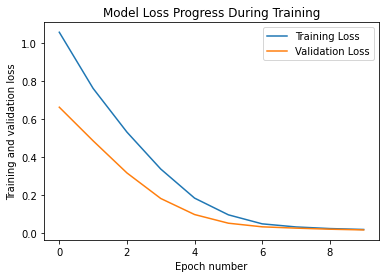

In [587]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch number')
plt.ylabel('Training and validation loss')
plt.legend(['Training Loss','Validation Loss'])

In [588]:
X_test=np.array([[1,50,50000,10000,600000]])
y_predict=ann.predict(X_test)

In [589]:
print('Expected Purchase Amount',y_predict)

Expected Purchase Amount [[269637.1]]
